## SKOLTECH, Experimental Data Processing

## Evgenii Safronov, Mikhail Kurenkov, Taras Melnik

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import numpy.random
from numpy.linalg import inv
import random
import pylab
%matplotlib inline

# Read data

In [10]:
ρ = np.loadtxt('ro.txt')
ϕ = np.loadtxt('fi.txt')

n_img = 4
imgs = []
bords = []
for i in range(1, n_img + 1):
    imgs.append(np.loadtxt("Image%d.txt"%i))
    bords.append(np.loadtxt("borders%d.txt"%i))

# Plot images

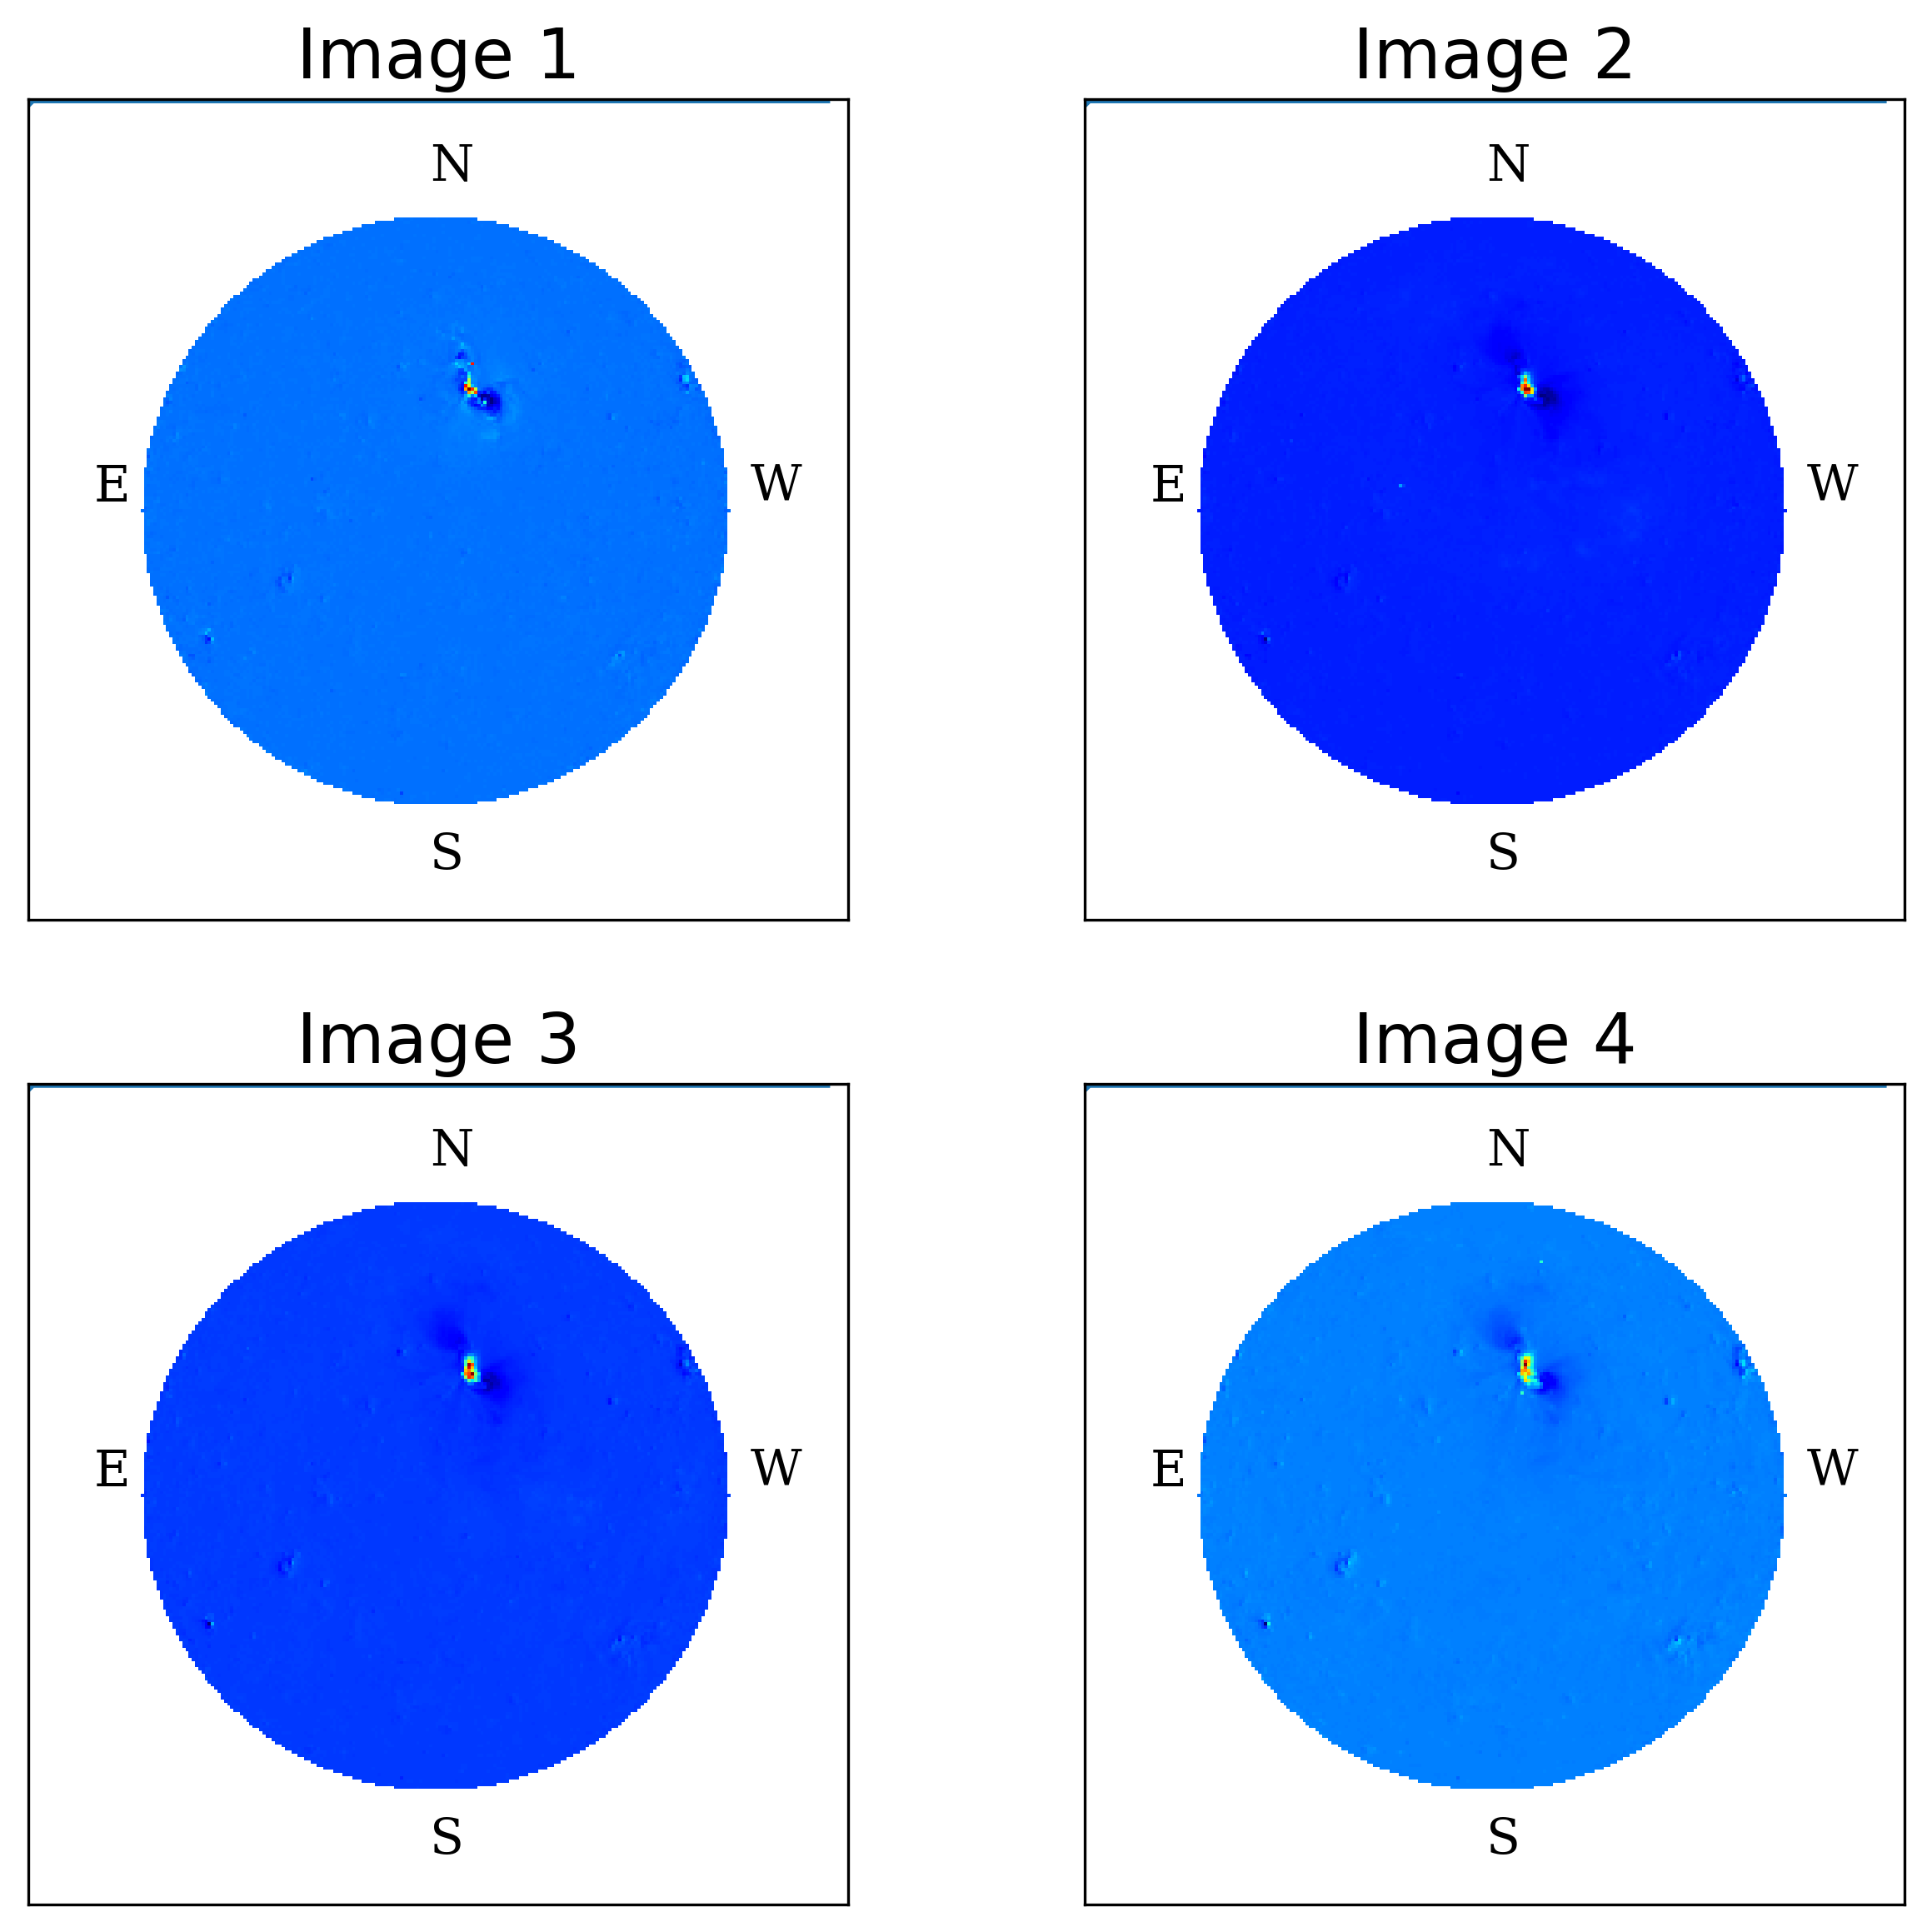

In [6]:
fig = plt.figure(figsize = (10,20), dpi=300)
img_names = ['Image 1', 'Image 2', 'Image 3', 'Image 4']
for i in range(4): 
    ax1 = fig.add_subplot(4, 2, i+1)
    ax1 = ax1.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.title(img_names[i], size = 20)
    plt.imshow(imgs[i], cmap = 'jet')
    xvals = numpy.arange (0, 250)
    yvals = numpy.sinc (xvals)
    pylab.plot (xvals, yvals)
    pylab.text (125, 25, u'N', family="serif", size = 'x-large')
    pylab.text (20, 125, u'E', family="serif", size = 'x-large')
    pylab.text (225, 125, u'W', family="serif", size = 'x-large')
    pylab.text (125, 240, u'S', family="serif", size = 'x-large')

plt.show()

# Select all pixels that belong to EUV wave front  

In [30]:
data = []
for i in range(4):
    img = imgs[i]
    bord = bords[i]
    all_points = np.array([ρ.flatten(), ϕ.flatten(), img.flatten()]).transpose()
    points = [p for p in all_points if bord[0] < p[0] < bord[1]]
    
    data.append(np.array(sorted(points, key=lambda x:x[1])))

# Plot dependence of intensity of a pixel belonging to EUV wave front 

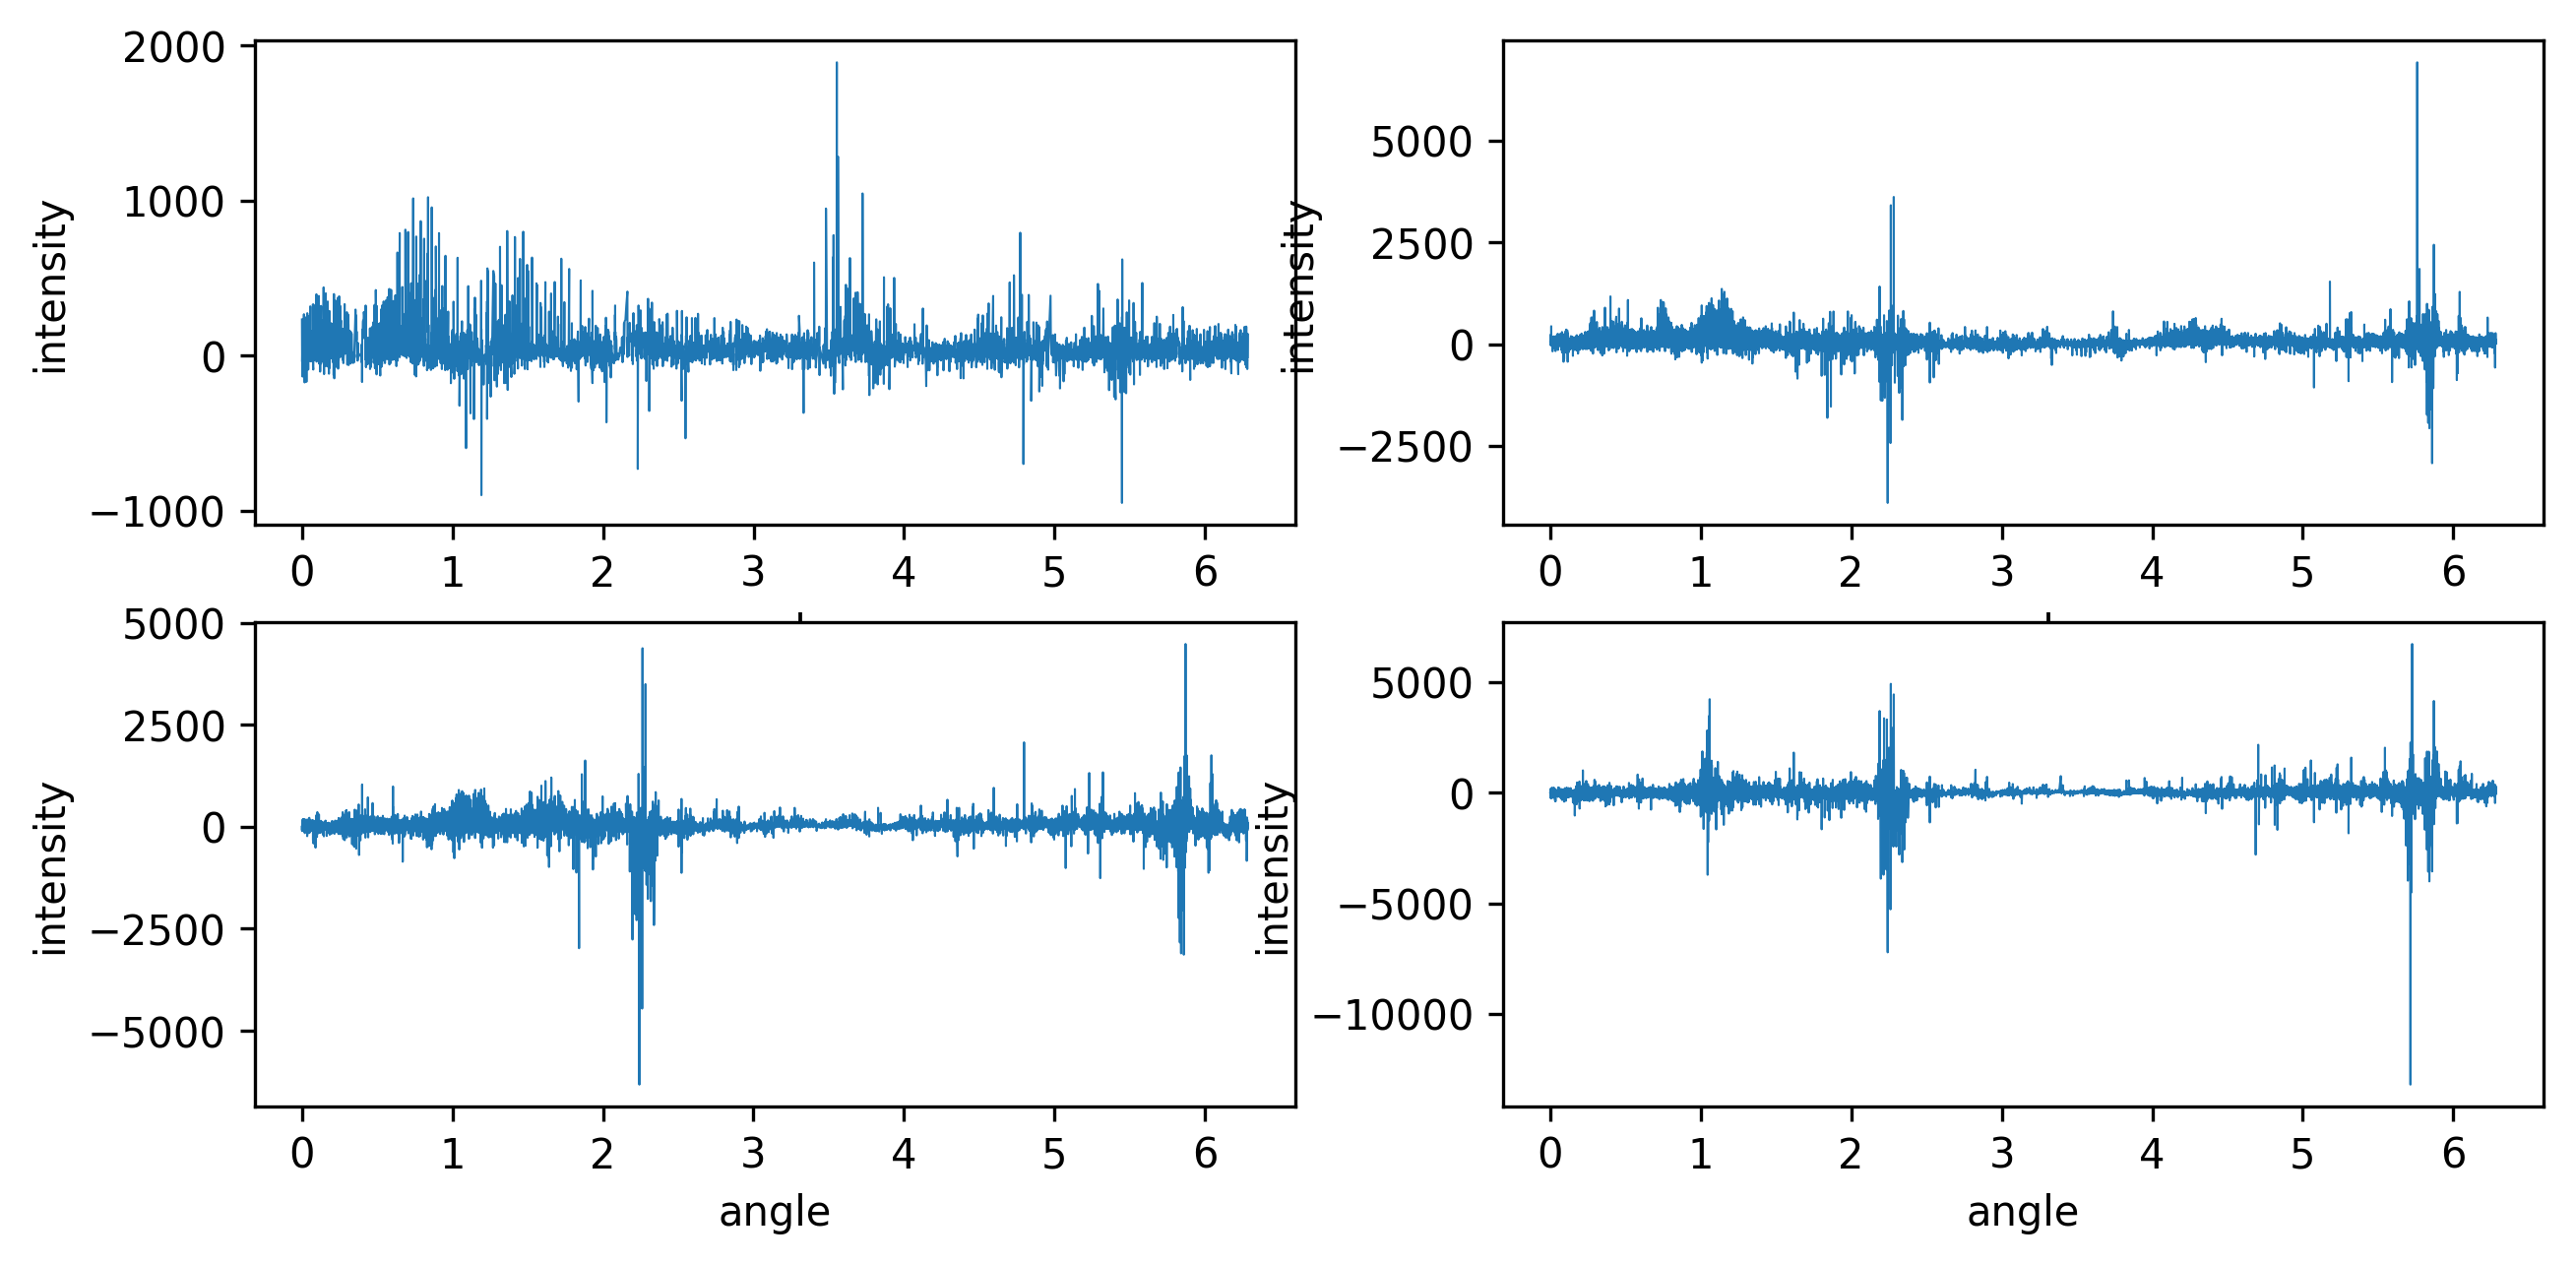

In [59]:
fig = plt.figure(figsize = (10,10), dpi=300)
for i in range(4):
    ax = fig.add_subplot(4, 2, i + 1) 
    ax.plot(data[i][:,1], data[i][:,2], linewidth=0.5)
    ax.set_xlabel("angle")
    ax.set_ylabel("intensity")

# Smoothing intensity

In [50]:
width = np.pi / 16
smooth_data = []
for i in range(4):
    angles = list(set(data[i][:, 1]))
    points = []
    for α in sorted(angles):
        min_α = max(α - width, 0)
        max_α = min(α + width, 2 * np.pi)
        intensity = np.mean(np.array([x[2] for x in data[i] if min_α < x[1] < max_α]))
        points.append([α, intensity])
    smooth_data.append(points) 

In [57]:
for i in range(4):
    smooth_data[i] = np.array(smooth_data[i])

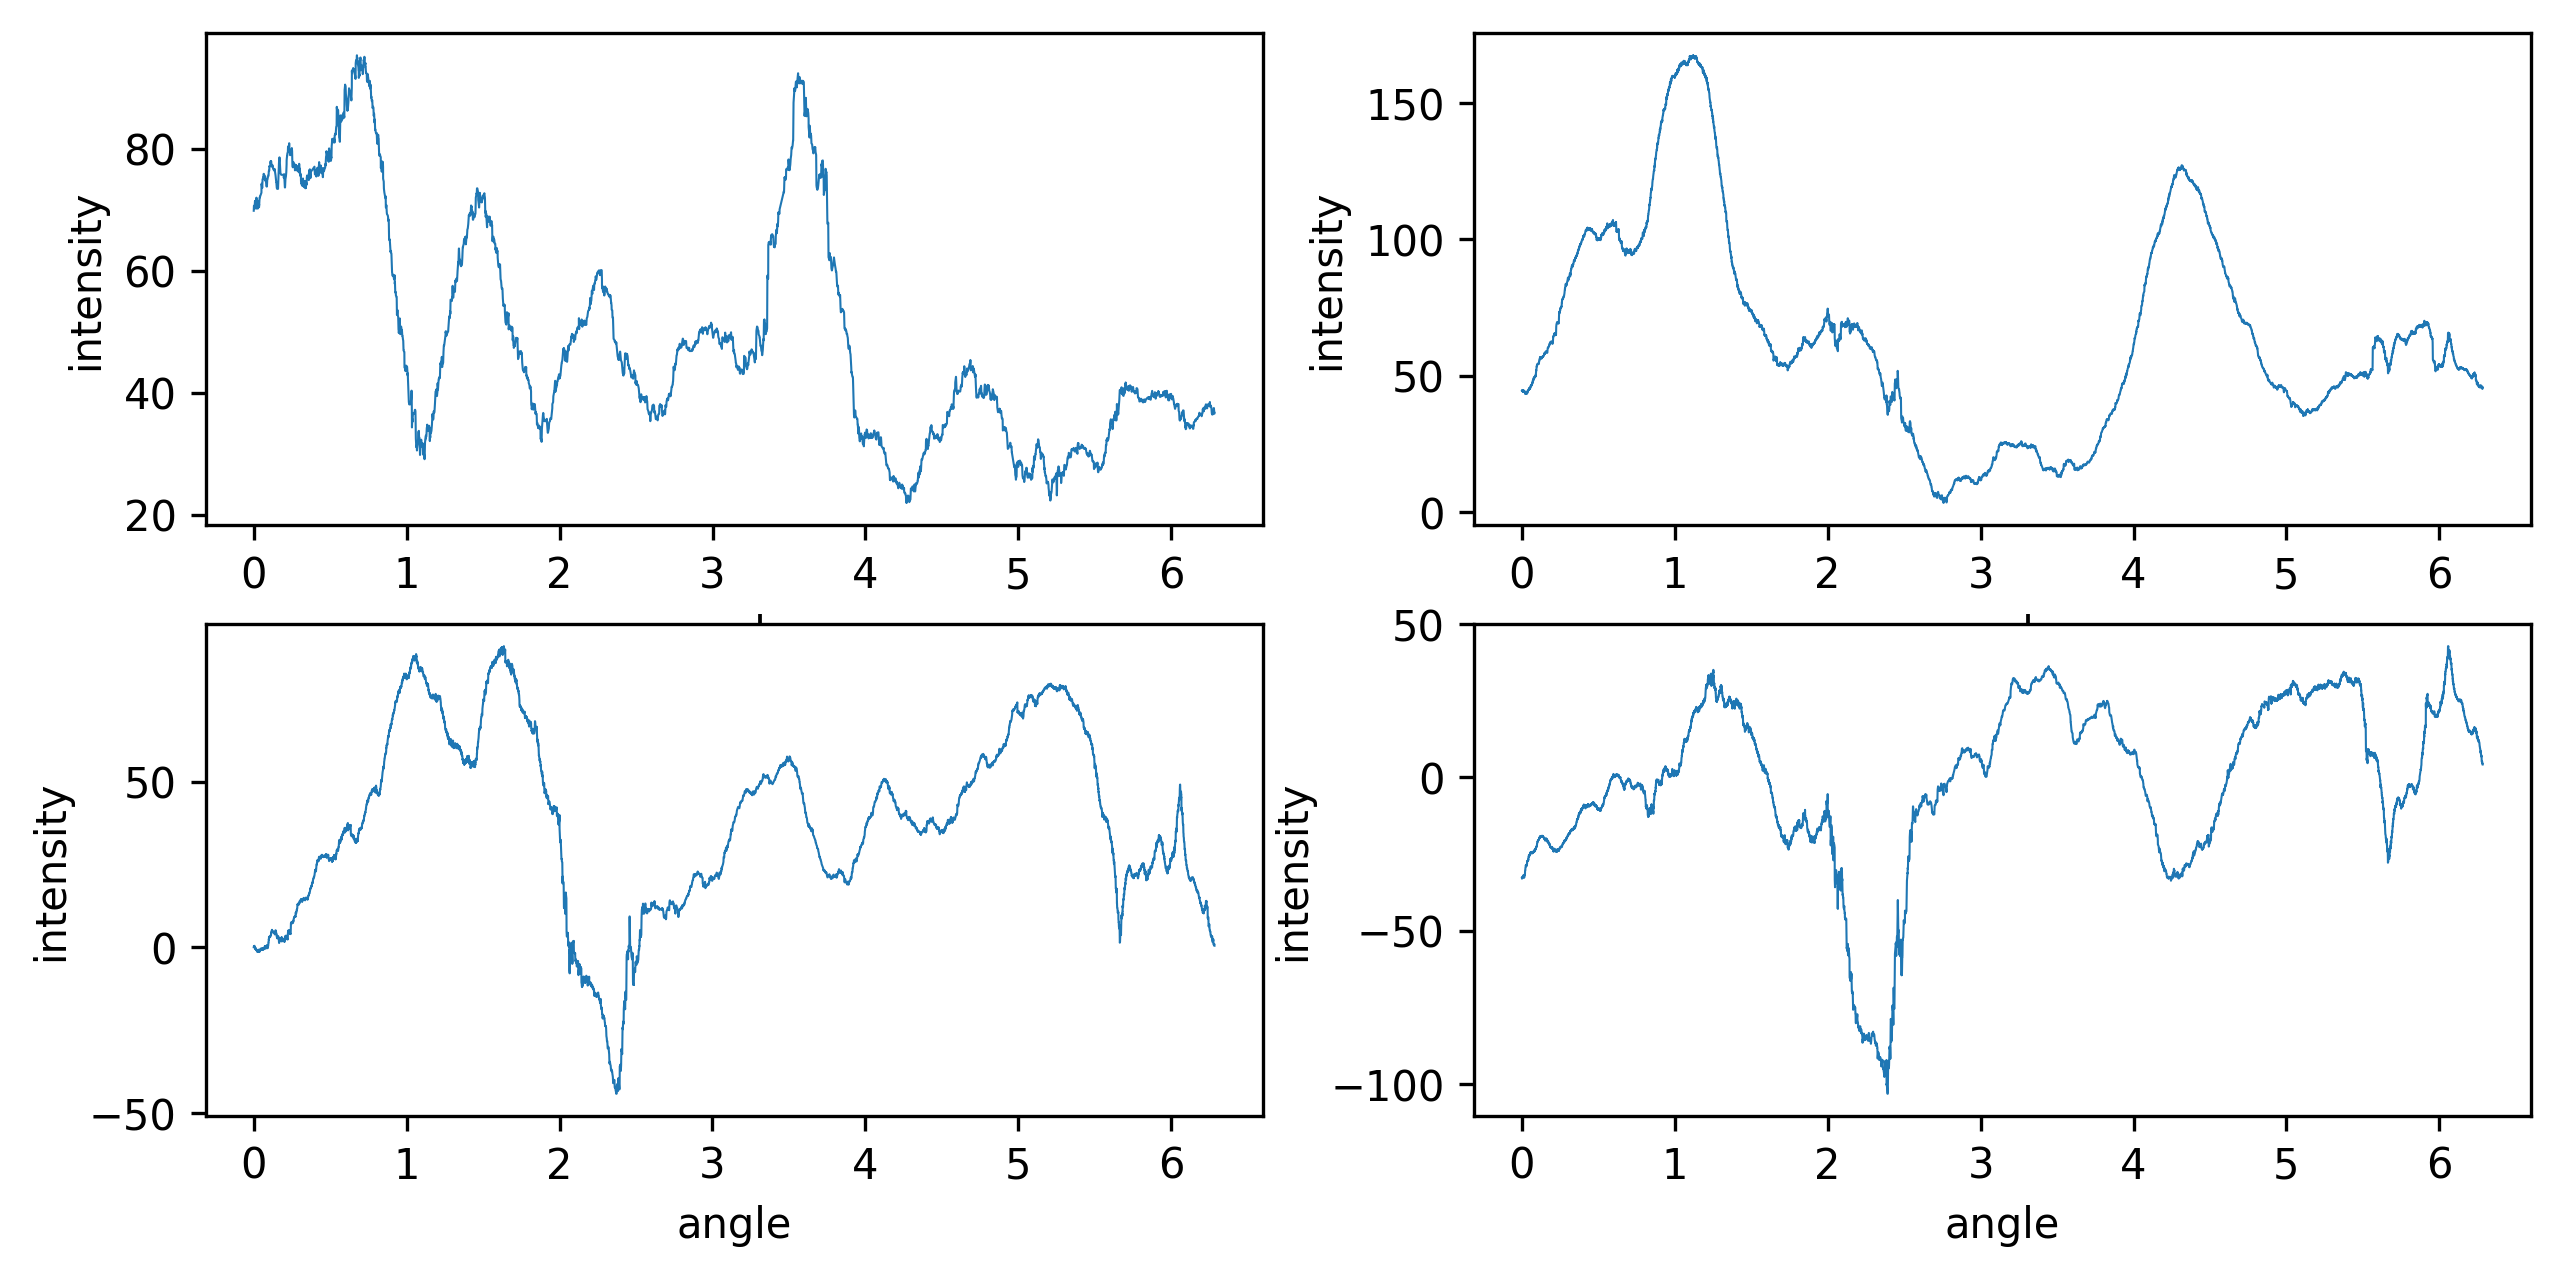

In [56]:
fig = plt.figure(figsize = (10,10), dpi=300)
for i in range(4):
    ax = fig.add_subplot(4, 2, i + 1) 
    ax.plot(smooth_data[i][:,0], smooth_data[i][:,1], linewidth = 0.5)
    ax.set_xlabel("angle")
    ax.set_ylabel("intensity")

# Remove pixels from the analysis that correspond to polar angles and Replace all negative intensities of pixels by zero 

In [67]:
final_data = []
for i in range(4):
    points = [x if x[1] > 0 else np.array([x[0], 0]) for x in smooth_data[i] if not 2 < x[0] < 4]
    final_data.append(np.array(points))

# Calculate the coordinate of intensity center for every image

In [70]:
centers = []
for i in range(4):
    c = np.sum(final_data[i][:, 0] * final_data[i][:, 1]) / np.sum(final_data[i][:, 1])
    centers.append(c)

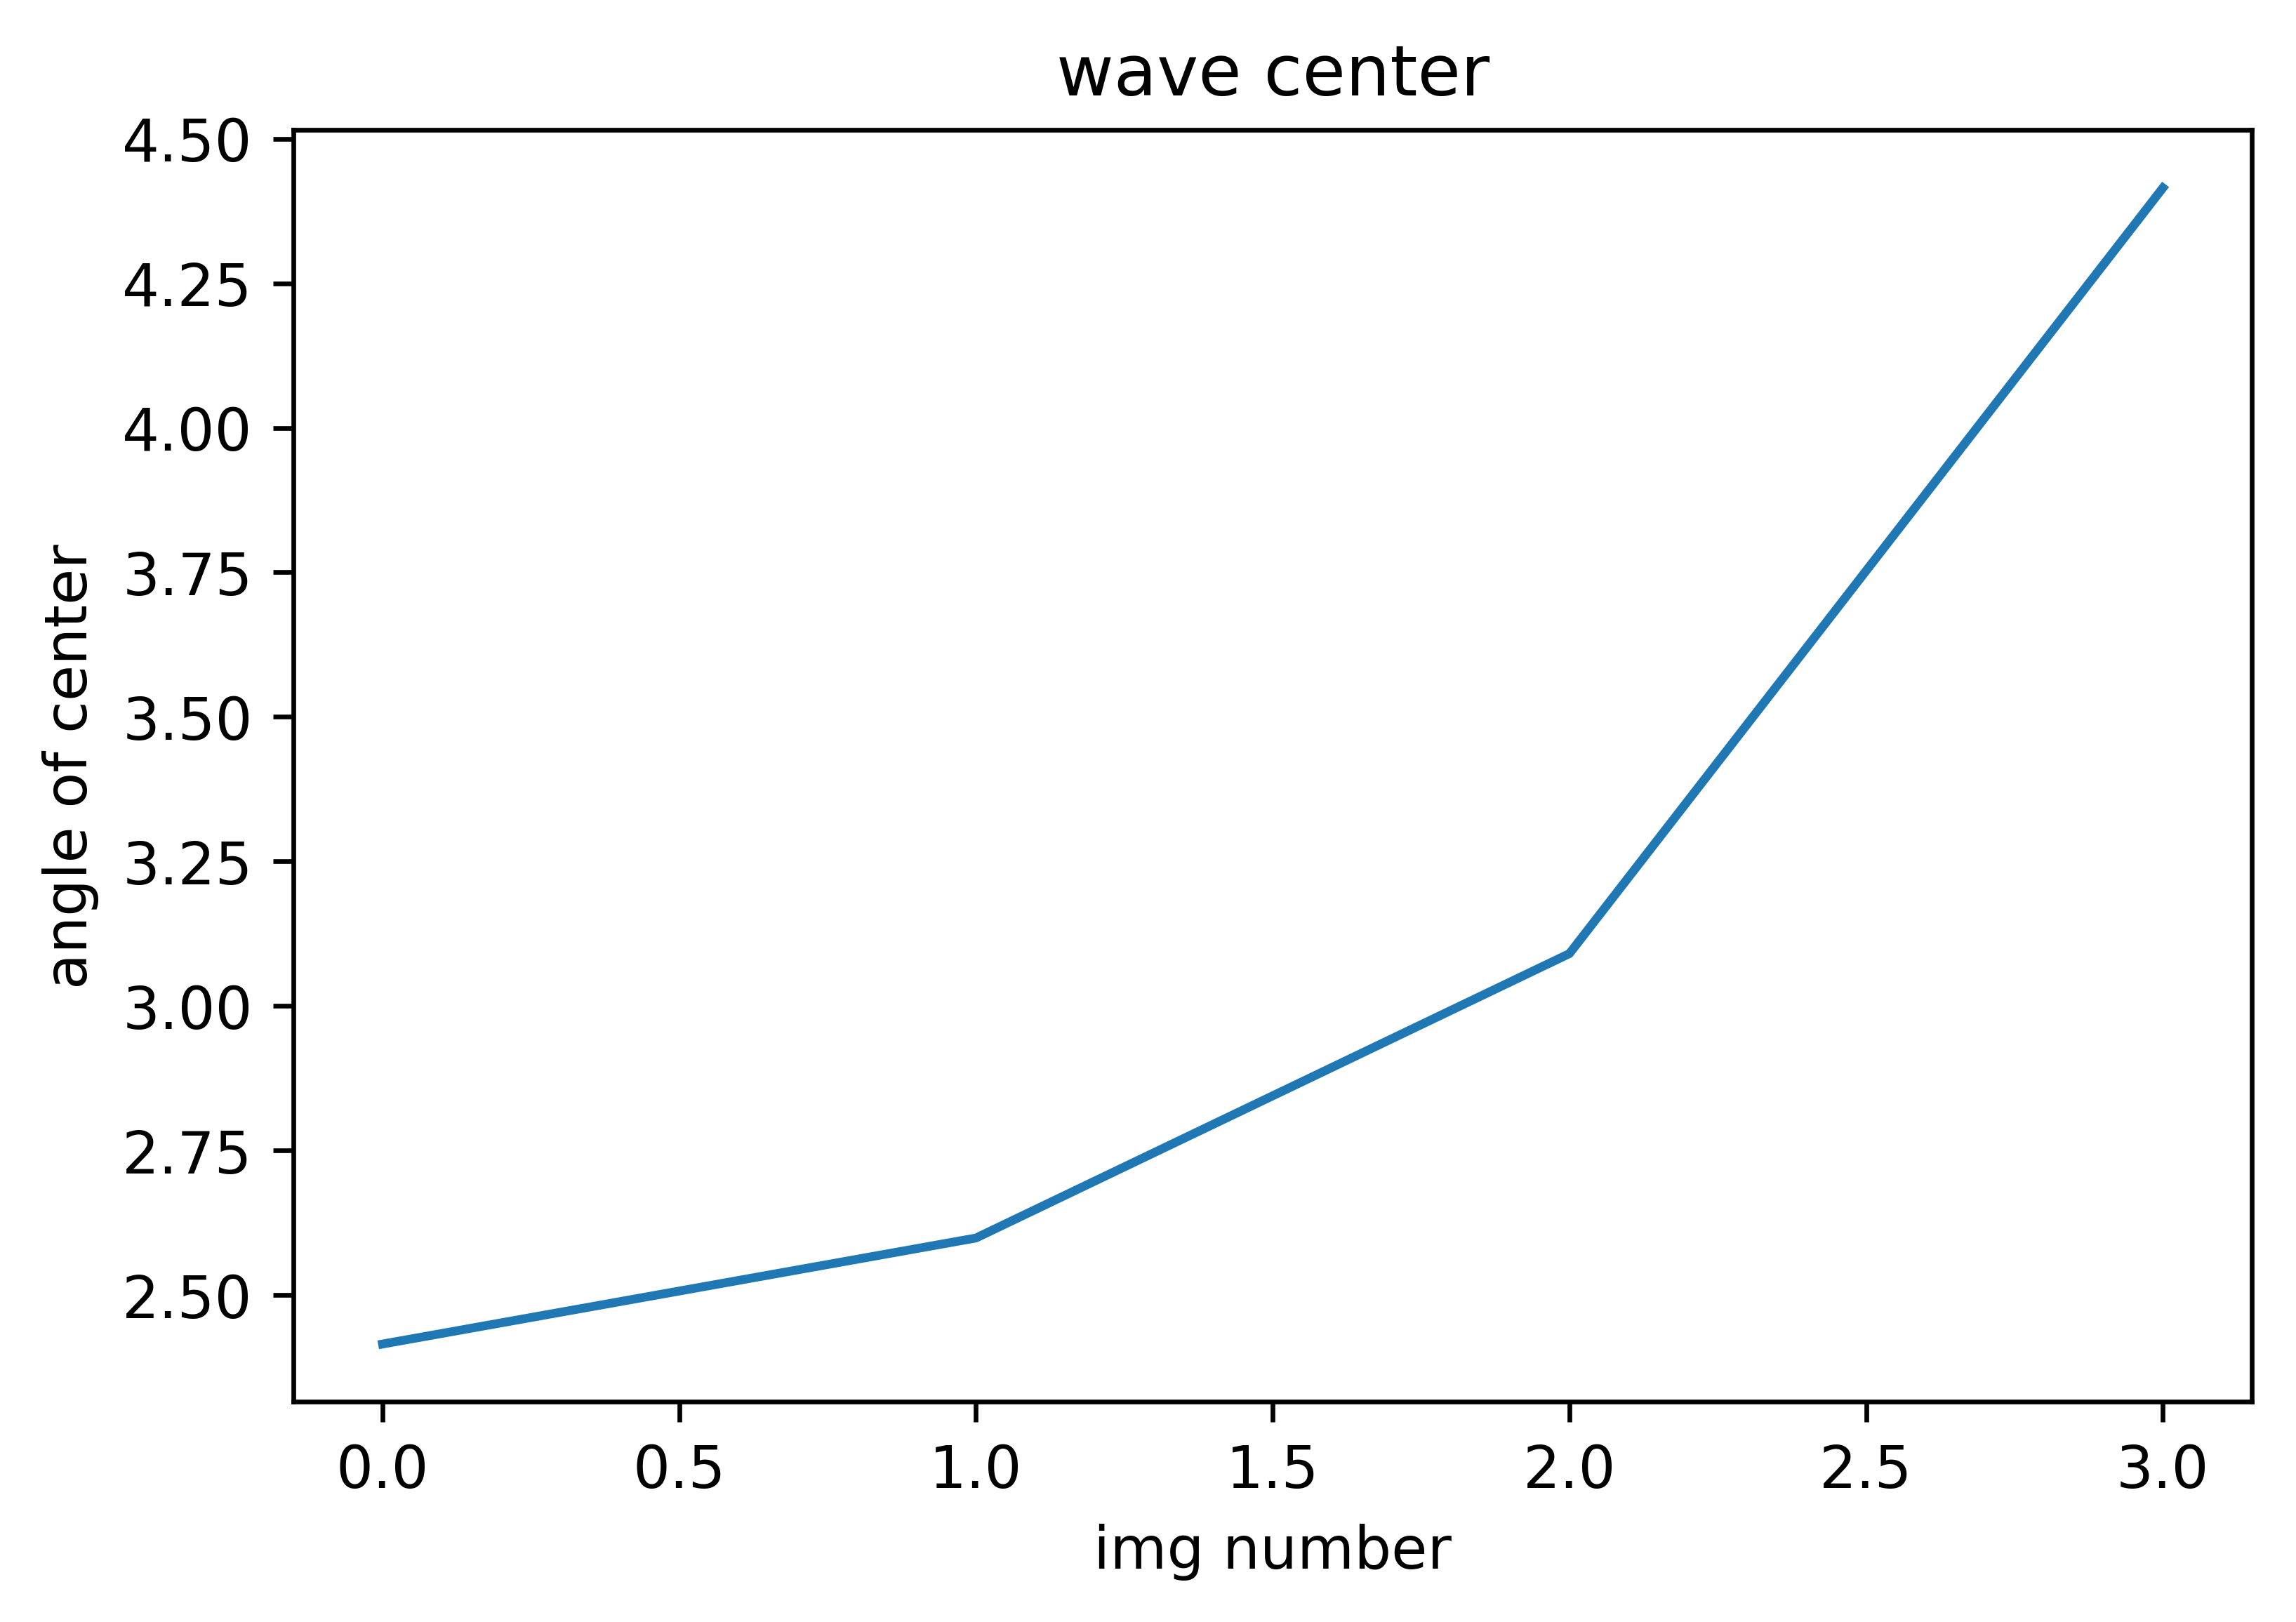

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=600)
ax.plot(centers)
ax.set_title("wave center")
ax.set_xlabel("img number")
ax.set_ylabel("angle of center");

## The angle of centers increases over the number of the images, and so it is obvious that there is a rotation of center of wave